In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 캑글 사이트에 가면 구해야할 데이터 문제들 있음
df = pd.read_csv('titanic.csv')

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 나이 값은 null값으로 둘 수도 없고 알아낼 수 도 없으니 평균 값으로 대체 지정한다.
# 선실번호(carbin), 항구(embarked)도 대체 지정하거나 빼야하는데 N값으로 대체 지정한다.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# fillna 함수로 평균값 이나 고정 값으로 변경해준다.
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('N',inplace=True)
df['Embarked'].fillna('N',inplace=True)

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# 성별, 선실번호, 항구 데이터는 안의 문자를 확인하고 숫자로 바꾸는 작업 해야함.
# 일단 고유의 값들의 개수들을 확인해줌
df['Sex'].value_counts()
# 성별 같은 케이스는 숫자로만 바꿔주는 작업 하면 될듯함.

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [12]:
# 선실 번호들의 첫 글자(알파벳)만 추출해서 원래 있던 데이터데 다시 저장
df['Cabin'] = df['Cabin'].str[:1]

In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [14]:
# 조건에 만족하는 행에 대한 정보를 세는 것이니 이렇게 조회해도 된다.
df.groupby(['Sex','Survived'])['Survived'].count()

# 성별에 따른 생존율 계산함.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

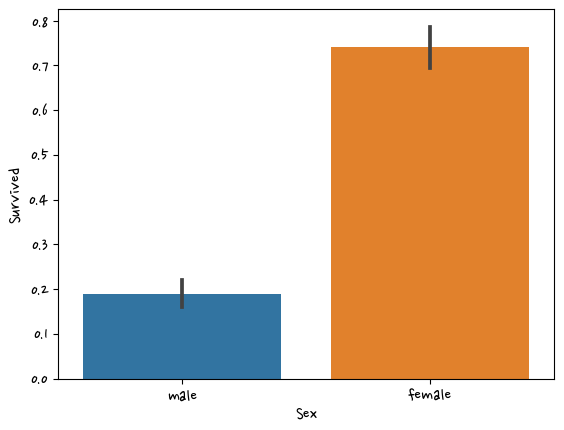

In [15]:
# 성별/생종률 시각화
sns.barplot(data=df,x='Sex',y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

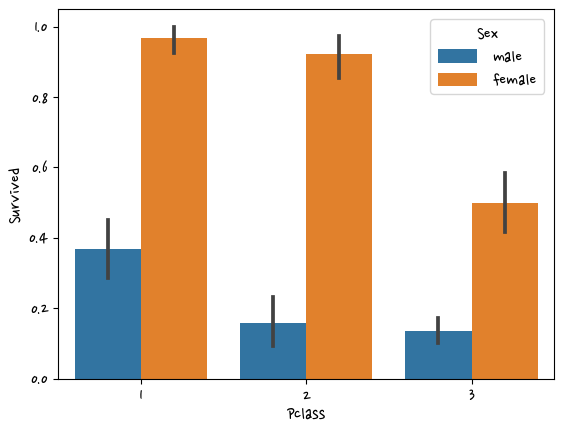

In [16]:
# 선실등급/생존률/성별 시각화
sns.barplot(data=df,x='Pclass',y='Survived',hue='Sex')

In [17]:
# 나이대에 따라서 구분해보자.
# apply 함수로 처리를 할 예정
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [18]:
# 나이대 구분 함수 만들어줌.
def get_category(age):
    cat=''
    if age <= -1:cat='Unknown'
    elif age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <= 18: cat='Teenager'
    elif age <= 25: cat='Student'
    elif age <= 35: cat='Young Adult'
    elif age <= 60: cat='Adult'
    else: cat = 'Elderly'
    return cat

In [19]:
# 나이대 구분 함수 사용해서 새로운 데이터 넣고, 그걸 df으로 저장
df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

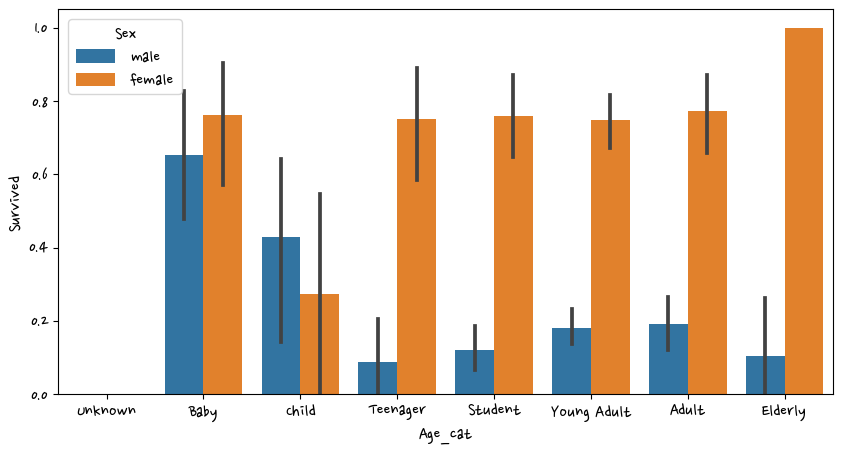

In [20]:
# barplot 사이즈 조절
plt.figure(figsize=(10,5))
# 칼럼 순서 내가 원하는대로 지정 (~`order=group_name`)
group_name = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
# 오더값 통해서 원하는 순서대로 지정 `order=group_name`
sns.barplot(data=df,x='Age_cat',y='Survived',order=group_name,hue='Sex')

In [21]:
# 레이블 인코더 적용하기

In [22]:
# 분류값에서는 숫자값에 대한 영향이 있을 수 있어서 오류가 있지만 숫자값이 몇개 없으면 크게 영향 없어서 그냥 레이블 인코딩 한다.

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
def encode_features(dataDF):
    features=['Sex','Cabin','Embarked']
    for feature in features:
        le = LabelEncoder()
        dataDF[feature] = le.fit_transform(dataDF[feature])
        # 데이터 몇 개 안되면 그냥 숫자값에 뭐가 있는지 보고 작업하면 좋다.
        print(le.classes_)
    return dataDF

In [25]:
df = encode_features(df)
# 여기선 이정도만 저장해놔도 숫자값으로 바꾸는데 문제가 없다.

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


In [26]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult


In [27]:
# 데이터 수정할 내용 바꿔주고
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
    return df

def format_features(df):
    #레이블 인코더는 함수 안에 같이 넣어주는 것이 좋다.
    from sklearn.preprocessing import LabelEncoder
    
    df['Cabin'] = df['Cabin'].str[:1]
    features=['Sex','Cabin','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        # 데이터 몇 개 안되면 그냥 숫자값에 뭐가 있는지 보고 작업하면 좋다.
        print(le.classes_)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

df = pd.read_csv('titanic.csv')
y = df['Survived']
X = df.drop(columns=['Survived'])
X = transform_features(X)

X.head(2)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [34]:
# 트리구조
from sklearn.tree import DecisionTreeClassifier
# 앙상블
from sklearn.ensemble import RandomForestClassifier
# 로지스틱 >> 2진 분류
# 생존 / 사망 구분이니 로지스틱 분류로 간다.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

In [36]:
# 각각의 방법으로 생존율 학습하고 데이터 예측 해보니까 이렇게 나옴. 

In [37]:
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test,dt_pred)

0.7877094972067039

In [38]:
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.8547486033519553

In [39]:
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
accuracy_score(y_test,lr_pred)

0.8659217877094972

In [40]:
# 결과
# lr_clf = LogisticRegression(solver='liblinear') 모델이 가장 예측을 잘 했다.

In [41]:
# KFold 교차 검증하기
# - 책 참고하고 생략

가우시안 정규분포와 예측 결과가 잘 안맞으면 데이터가 제대로 수집되지 않았다는 것이다. 
데이터를 더 수집하면 좋지만 그렇지 않다면 가우시안 정규분포에 맞게 조정하는 과정도 나중에 배운다. (log방법 등)

In [42]:
from sklearn.model_selection import GridSearchCV

In [57]:
param ={
    # 트리의 최대 깊이
    # → 완벽하게 클래스 값이 결정될 때 까지 분할
    # 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
    # - 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
    'max_depth' : [2,3,5,10],
    # split 하기위한 최소 개수가 2개는 있어야 함.
    'min_samples_split' : [2,3,5],
    # leaf 모드가 되기 위한 최소 샘플 수가 1개가 돼야 함.
    'min_samples_leaf' : [1,5,8],
}

In [58]:
# 교차 검증 경우의 수 = 5
grid = GridSearchCV(dt_clf,param,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [59]:
pred = grid.predict(X_test)

In [60]:
accuracy_score(y_test,pred)

0.8715083798882681

In [61]:
#  `GridSearchCV` 를 사용하여 똑같은 디시전트리이지만 
# 파라미터 튜닝까지 같이 하니까 성능이 더 좋아졌다.

In [62]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [63]:
list(zip(y_test,pred))

[(1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 

In [1]:
grid.cv_results_

NameError: name 'grid' is not defined